# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
column_names = ('City', 'Country', 'Latitude', 'Longitude', 'Date', 'Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')

wp_df = pd.DataFrame(columns = column_names)
wp_df

,City,Country,Latitude,Longitude,Date,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [19]:
# Start URL for API Call
count = 1
sets = 1
error = 0
index = 0
t0 =time.time()

settings = {"units": "imperial", "appid": api_key}

print("Beginning Data Retrieval \n --------------------------------------")


for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        city_stats = owm.get_current(city, **settings)
        wp_df.set_value(index, "City", city_stats["name"])
        wp_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        wp_df.set_value(index, "Country", city_stats("sys.country"))
        wp_df.set_value(index, "Date", city_stats("dt"))
        wp_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        wp_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        wp_df.set_value(index, "Lat", city_stats("coord.lat"))
        wp_df.set_value(index, "Lng", city_stats("coord.lon"))
        wp_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(f"City not found. Skipping...")
        pass
        error= error+1
    count = count+1
    if count == 50:
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("--------------------------------------- \n Data Retrieval Complete \n --------------------------------------")

print(f'Could not get data for {error} cities')

Beginning Data Retrieval 
 --------------------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | batagay-alyta
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | xuddur
Processing Record 8 of Set 1 | dakar
Processing Record 9 of Set 1 | herat
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | sciacca
Processing Record 16 of Set 1 | saint anthony
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1

Processing Record 34 of Set 4 | lasa
Processing Record 35 of Set 4 | usinsk
Processing Record 36 of Set 4 | gostovici
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | jamestown
Processing Record 39 of Set 4 | hongan
City not found. Skipping...
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | coffeyville
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | jackson
Processing Record 46 of Set 4 | khuzdar
Processing Record 47 of Set 4 | belyy yar
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | minas de barroteran
Processing Record 1 of Set 5 | moerai
Processing Record 2 of Set 5 | goure
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | nioro
Processing Record 5 of Set 5 | port keats
Processing Record 6 of Set 5 | mount gambier
Processi

Processing Record 22 of Set 8 | kaffrine
Processing Record 23 of Set 8 | kachug
Processing Record 24 of Set 8 | tabas
Processing Record 25 of Set 8 | saiha
Processing Record 26 of Set 8 | biak
Processing Record 27 of Set 8 | rio brilhante
Processing Record 28 of Set 8 | kirakira
Processing Record 29 of Set 8 | teguise
Processing Record 30 of Set 8 | nishihara
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | formosa
Processing Record 33 of Set 8 | banamba
Processing Record 34 of Set 8 | anito
Processing Record 35 of Set 8 | port shepstone
Processing Record 36 of Set 8 | valparaiso
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | bac lieu
City not found. Skipping...
Processing Record 41 of Set 8 | ottawa
Processing Record 42 of Set 8 | aginskoye
Processing Record 43 of Set 8 | mana
Processing Record 44 of Set 8 | coquimbo
Processing Record 45 of Set 8 | ulaang

Processing Record 11 of Set 12 | padang
Processing Record 12 of Set 12 | lamu
Processing Record 13 of Set 12 | leh
Processing Record 14 of Set 12 | brenham
Processing Record 15 of Set 12 | oistins
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | marrakesh
Processing Record 18 of Set 12 | esperance
Processing Record 19 of Set 12 | kingaroy
Processing Record 20 of Set 12 | utiroa
City not found. Skipping...
Processing Record 21 of Set 12 | ketchikan
Processing Record 22 of Set 12 | hualmay
Processing Record 23 of Set 12 | victoria point
Processing Record 24 of Set 12 | impfondo
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | imperia
Processing Record 27 of Set 12 | gushikawa
Processing Record 28 of Set 12 | jiddah
City not found. Skipping...
Processing Record 29 of Set 12 | alice springs
Processing Record 30 of Set 12 | rumoi
Processing Record 31 of Set 12 | cap malheureux
Processing Record 32 of Set 12 | kayerkan
Processing Record 33

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
wp_df.count()

City                522
Country             522
Latitude              0
Longitude             0
Date                522
Temp (F)              0
Humidity (%)          0
Cloudiness (%)        0
Wind Speed (mph)      0
Cloudiness          522
Max Temp            522
Wind Speed          522
Lat                 522
Lng                 522
Humidity            522
dtype: int64

In [21]:
wp_df.to_csv("WeatherPy.csv", encoding='utf-8',index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

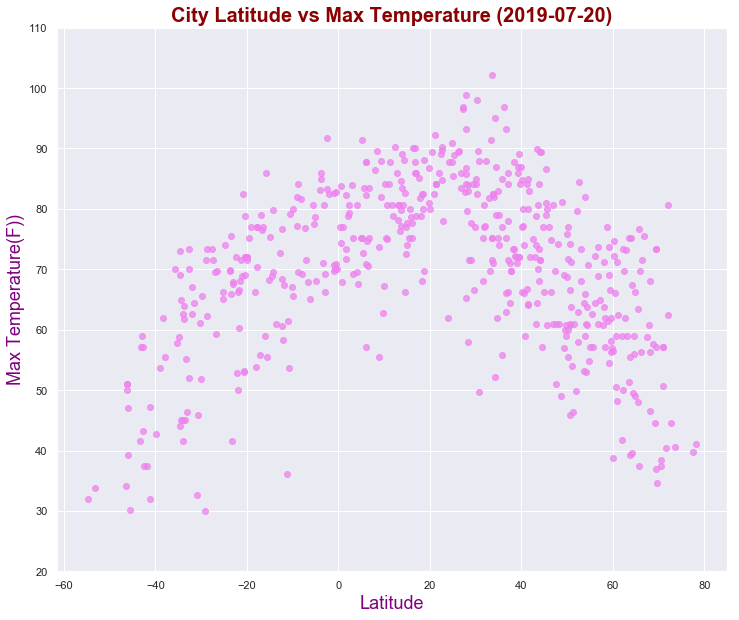

In [22]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(wp_df["Lat"], wp_df["Max Temp"], color = "violet", alpha=.75)
plt.grid(True)
plt.ylim(20,110)
plt.xlabel('Latitude', fontsize = 18, color = "purple" )
plt.ylabel('Max Temperature(F))', fontsize = 18, color = "purple")
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'darkred')
plt.savefig("City_Latitude_vs_Max_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

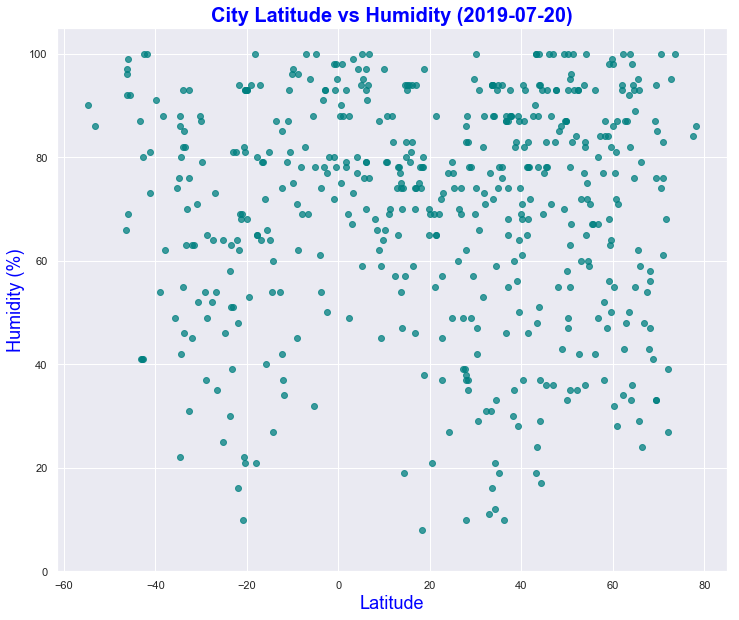

In [23]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(wp_df["Lat"], wp_df["Humidity"], color = "teal", alpha=.75)
plt.ylim(0,105)
plt.grid(True)
plt.xlabel('Latitude', fontsize = 18, color = "blue" )
plt.ylabel('Humidity (%)', fontsize = 18, color = "blue")
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'blue')
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

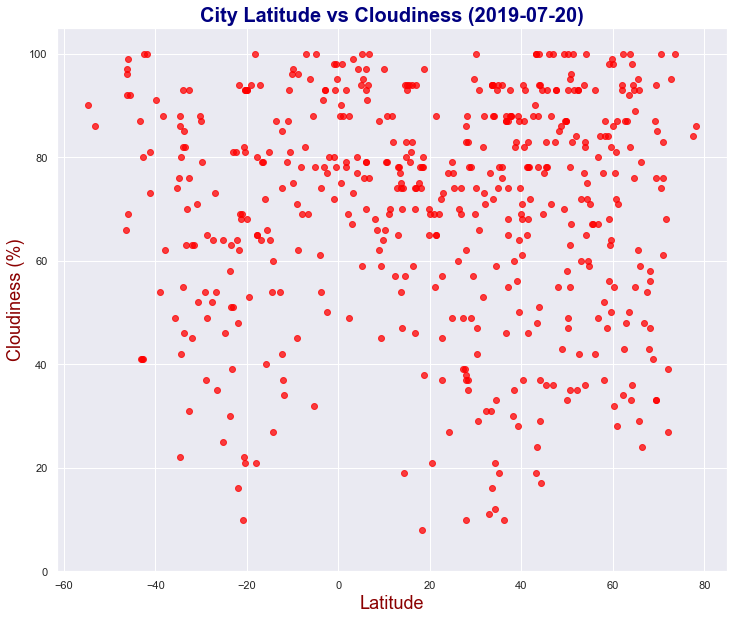

In [24]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(wp_df["Lat"], wp_df["Humidity"], color = "red", alpha=.75)
plt.ylim(0,105)
plt.grid(True)
plt.xlabel('Latitude', fontsize = 18, color = "darkred" )
plt.ylabel('Cloudiness (%)', fontsize = 18, color = "darkred")
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'navy')
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

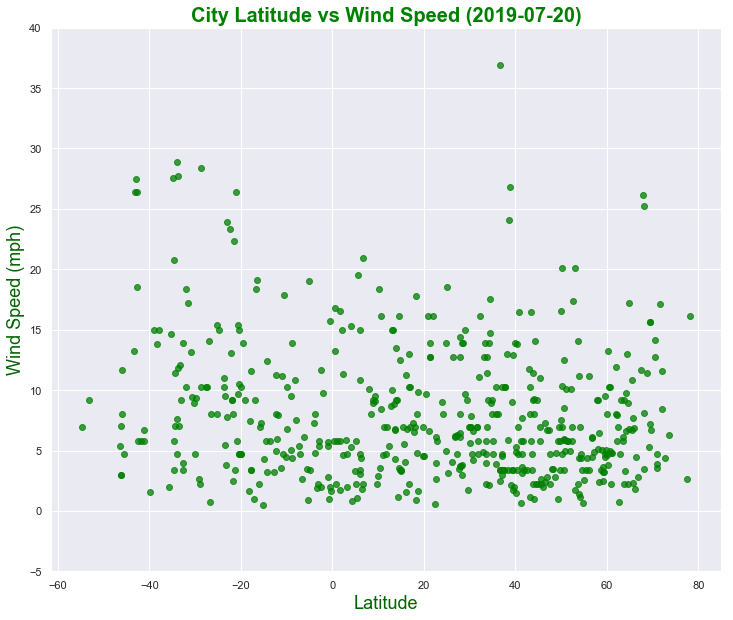

In [25]:
plt.figure(figsize =(12,10))
sns.set()
plt.scatter(wp_df["Lat"], wp_df["Wind Speed"], color = "green", alpha=.75)
plt.ylim(-5,40)
plt.grid(True)
plt.xlabel('Latitude', fontsize = 18, color = "darkgreen" )
plt.ylabel('Wind Speed (mph)', fontsize = 18, color = "darkgreen")
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})', fontsize = 20, fontweight='bold', color = 'green')
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show()